In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List

def plotGraph(f, an:List, limit_inf:float, limit_sup:float):
    #f:function
    
    #create 100 equally spaced points between limit_inf and limit_sup
    x = np.linspace(limit_inf, limit_sup, 100)
    #calculate the y value for each element of the x vector
    y:List = []
    for xk in x:
        y.append(f(xk))
        
    plt.plot(x, y)
    
    plt.grid(b=True)
    for xn in an:
        plt.scatter(xn, f(xn), marker="o")

In [2]:
def aproxNewton(f, Df, x0:float, epsilon:float, n_iter:int) -> List:
    #f:function
    #Df:function

    fxn:float = None
    Dfxn:float = None
    an:List = []
    i:int = -1
        
    xn:float = x0
        
    for n in range(n_iter):
        
        an.append(xn)
        i += 1
        
        if(i > 0):
            erro = abs(xn - an[i-1])/abs(xn)
            if(erro <= epsilon):
                print(f"Solução encontrada na {n+1}º iteração.")
                return xn, an, erro
        
        Dfxn = Df(xn)
        if Dfxn == 0.0:
            print(f"Derivada nula. Solução não encontrada.")
            return None, an, None
        
        fxn = f(xn)
        xn = xn-(fxn/Dfxn)
        
    print(f"Fim das iterações. Solução não encontrada.")
    return None, an, None

In [3]:
import math

g = lambda f : 1/math.sqrt(f) + 0.86859*math.log(0.000081081 + 0.0001826384341/math.sqrt(f))
Dg = lambda f : ((-0.00018/math.sqrt(f))-0.00024)/(2*f**(3/2)*(0.00018/math.sqrt(f)+0.00008))
x0:float = 0.008
epsilon:float = 1e-8
n_iter:int = 35

Solução encontrada na 8º iteração.
f(x) = 0 para x = 0.02896775741626389
(an) = [0.008, 0.0157562199989132, 0.024125558372913383, 0.028352034480173496, 0.028956583433311308, 0.0289677229609929, 0.02896775731981393, 0.02896775741626389]
Erro = 3.3295626310993273e-09


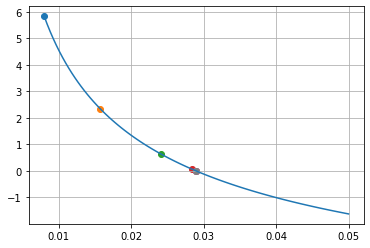

In [4]:
result:List = aproxNewton(g, Dg, x0, epsilon, n_iter)
print(f"f(x) = 0 para x = {result[0]}")
print(f"(an) = {result[1]}")
print(f"Erro = {result[2]}")
plotGraph(g, result[1], x0, 0.05)

In [5]:
teste:float = 0.8
print(f"g(f) = {g(teste)}")
print(f"Dg(f) = {Dg(teste)}")
print(f"g(f)/Dg(f) = {g(teste)/Dg(teste)}")
teste-g(teste)/Dg(teste)

g(f) = -5.971441021268703
Dg(f) = -1.096299925959911
g(f)/Dg(f) = 5.446904519345067


-4.6469045193450675